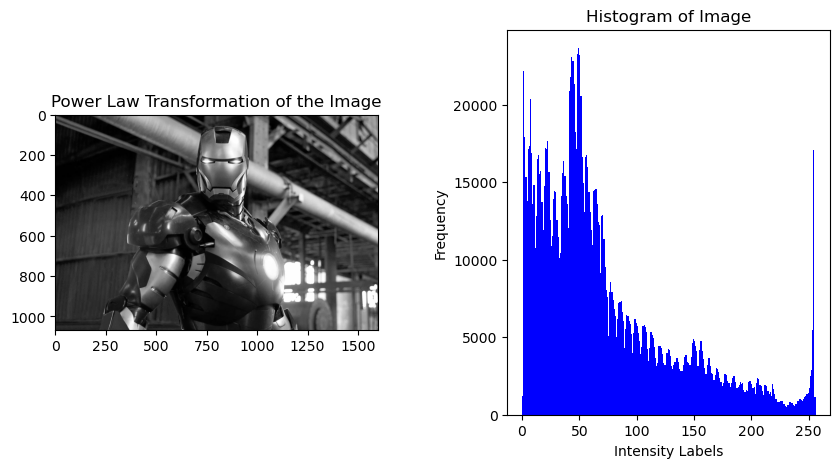

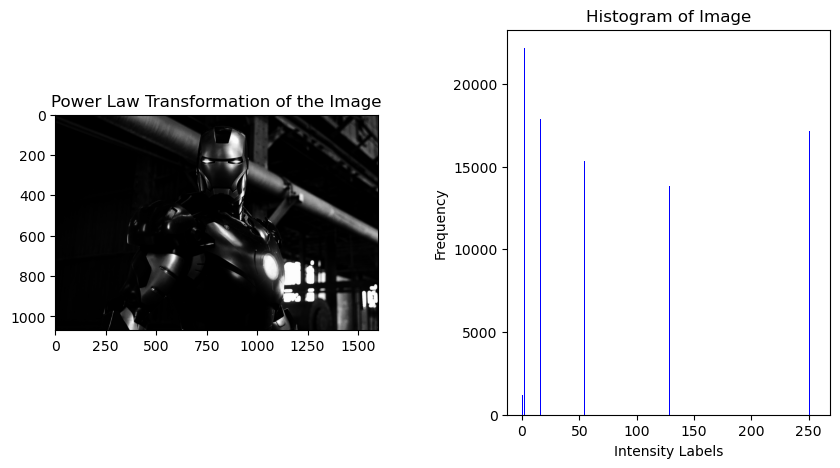

In [20]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math
        
        
class intensity_trans:
    def __init__(self, loc, method, power = None):
        loc = r'im3.webp'
        self.image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
        self.M, self.N = self.image.shape
        self.L = 255
        self.plot(image = self.image)
        if method == 'negative':
            output = self.negative_transformation()
            self.plot(image = output)
        elif method == 'log':
            output1, output2 = self.logarithmic_transformation()
            self.plot(image = output1)
            self.plot(image = output2)
        elif method == 'power_law':
            output = self.powerlaw_transformation(power)
            self.plot(image = output)

    def input_image(self):
        return 0
            
        
    def negative_transformation(self):
        output = np.zeros((self.M,self.N), dtype = np.float32) 
        #g = 255 - img  #this is also correct
        for i in range(self.M):
            for j in range(self.N):
                output[i, j] = self.L - 1 - self.image[i, j] 
        return output
    
    def logarithmic_transformation(self):
        output1 = np.zeros((self.M,self.N), dtype = np.float32)
        output2 = np.zeros((self.M,self.N), dtype = np.float32)
        c = 255 / (math.log10(1 + np.max(self.image)))    #see bookmark
        #log transformation
        for i in range(self.M):
            for j in range(self.N):
                output1[i, j] = c*math.log10(1+self.image[i,j])
        #inver log transformation
        for i in range(self.M):
            for j in range(self.N):
                output2[i, j] = 10**(self.image[i,j]/c) - 1
        return output1, output2
    
    def powerlaw_transformation(self, power):
        output = np.zeros((self.M,self.N), dtype = np.float32)
        c = 2
        #log transformation
        for i in range(self.M):
            for j in range(self.N):
                output[i, j] = c*(self.image[i,j])**power
        return output
    
    def plot(self, image):
        plt.figure(figsize=(10, 5))
        plt.subplot(121),plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.subplot(122), plt.hist(image.ravel(),bins = 256, range= [0,256], color = 'blue')
        plt.title('Histogram of Image')
        plt.xlabel('Intensity Labels')
        plt.ylabel('Frequency')
        plt.subplots_adjust(wspace=0.4)
        return plt.show()

        
loc = r'im3.webp'
intensity_trans(loc, method = 'power_law', power = 3)

